<a href="https://colab.research.google.com/github/alexseungminhan/Python-Colab-Data-Analysis/blob/main/used_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project

In [1]:
#mounting folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
'''
#install kaggle api

!pip install kaggle
!mkdir -p ~./kaggle
!cp /content/drive/MyDrive/Project/kaggle.json ~./kaggle
!ls  ~./kaggle
'''

'\n#install kaggle api\n\n!pip install kaggle\n!mkdir -p ~./kaggle\n!cp /content/drive/MyDrive/Project/kaggle.json ~./kaggle\n!ls  ~./kaggle\n'

In [3]:
'''
# download api
!kaggle datasets download -d taeefnajib/used-car-price-prediction-dataset
'''
!unzip /content/used-car-price-prediction-dataset.zip -d /content/drive/MyDrive/Project/Used_Car/ #unzip

unzip:  cannot find or open /content/used-car-price-prediction-dataset.zip, /content/used-car-price-prediction-dataset.zip.zip or /content/used-car-price-prediction-dataset.zip.ZIP.


In [4]:
import pandas as pd #panda library
filename = "/content/drive/MyDrive/Project/Used_Car/used_cars.csv"
car = pd.read_csv(filename)
car

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


# Exploratory Data Alnalsis(EDA)

- mileage: get rid of 'mi.' ','
- price: get rid of '$' ','
- fuel type: will be only looking at 'Hybrid','Diesel','E85 Flex Fuel','Gasoline'

In [5]:
#fuel type: will be only looking at 'Hybrid','Diesel','E85 Flex Fuel','Gasoline'
fuel =[ 'Hybrid','Diesel','E85 Flex Fuel','Gasoline']
car = car[car['fuel_type'].isin(fuel)]
car['model_year'] = car['model_year'].astype(int) #change to int
g_fuel = car.groupby('fuel_type').count()
g_fuel

<ipython-input-5-631c98530650>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['model_year'] = car['model_year'].astype(int) #change to int


,brand,model,model_year,milage,engine,transmission,ext_col,int_col,accident,clean_title,price
fuel_type,,,,,,,,,,,
Diesel,116,116,116,116,116,116,116,116,110,102,116
E85 Flex Fuel,139,139,139,139,139,139,139,139,133,128,139
Gasoline,3309,3309,3309,3309,3309,3309,3309,3309,3218,2815,3309
Hybrid,194,194,194,194,194,194,194,194,190,145,194


In [6]:
#price: get rid of '$' ','
car['price']=car['price'].str.replace('$','').str.replace(',','').astype(int)
'''
change price to str then replace
change to int
'''
car.head()

<ipython-input-6-ed0db10d49eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['price']=car['price'].str.replace('$','').str.replace(',','').astype(int)


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999


In [7]:
#mileage: get rid of 'mi.' ','
car['milage']=car['milage'].str.replace('mi.','').str.replace(',','').astype(int)
car.head()

<ipython-input-7-ce2687623497>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['milage']=car['milage'].str.replace('mi.','').str.replace(',','').astype(int)


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999


In [8]:
'''
b_group = car.groupby('brand').count()
b_group.sort_values('model',inplace=True,ascending=False)
b_group
'''

"\nb_group = car.groupby('brand').count()\nb_group.sort_values('model',inplace=True,ascending=False)\nb_group\n"

In [9]:
print(car.info())
car.dropna(inplace=True) #drop null data
print(car.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3758 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3758 non-null   object
 1   model         3758 non-null   object
 2   model_year    3758 non-null   int64 
 3   milage        3758 non-null   int64 
 4   fuel_type     3758 non-null   object
 5   engine        3758 non-null   object
 6   transmission  3758 non-null   object
 7   ext_col       3758 non-null   object
 8   int_col       3758 non-null   object
 9   accident      3651 non-null   object
 10  clean_title   3190 non-null   object
 11  price         3758 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 381.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 3190 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3190 non-null   object
 1   model         3190 n

<ipython-input-9-2eaee8f08405>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car.dropna(inplace=True) #drop null data


In [10]:
#find exterior colors that appear more than 10 times
b_group = car.groupby('ext_col').count()
b_group = b_group[b_group['model']>=10]
b_group.sort_values('model',inplace=True,ascending=False) #inplace: whether you will replace the original

color =b_group.index

'''
if you groupby ext_col, the ext_col will be in the first column.
index is the ext_col in the first column
'''

car = car[car['ext_col'].isin(color)]
car

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000
7,BMW,740 iL,2001,242000,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,7300
8,Lexus,RC 350 F Sport,2021,23436,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,41927
...,...,...,...,...,...,...,...,...,...,...,...,...
4002,Mercedes-Benz,AMG GLS 63 4MATIC,2023,2000,Hybrid,603.0HP 4.0L 8 Cylinder Engine Gasoline/Mild E...,9-Speed A/T,Gray,Beige,None reported,Yes,175000
4003,Mercedes-Benz,E-Class E 300 4MATIC,2018,53705,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,25900
4005,Audi,S4 3.0T Premium Plus,2022,10900,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900
4007,Ford,F-150 Raptor,2020,33000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999


In [11]:
#new data
new_car = car[['brand',	'model_year',	'milage',	'fuel_type','ext_col','accident','price']]
new_car

,brand,model_year,milage,fuel_type,ext_col,accident,price
0,Ford,2013,51000,E85 Flex Fuel,Black,At least 1 accident or damage reported,10300
3,INFINITI,2015,88900,Hybrid,Black,None reported,15500
6,Audi,2017,84000,Gasoline,Blue,None reported,31000
7,BMW,2001,242000,Gasoline,Green,None reported,7300
8,Lexus,2021,23436,Gasoline,Black,None reported,41927
...,...,...,...,...,...,...,...
4002,Mercedes-Benz,2023,2000,Hybrid,Gray,None reported,175000
4003,Mercedes-Benz,2018,53705,Gasoline,Black,At least 1 accident or damage reported,25900
4005,Audi,2022,10900,Gasoline,Black,None reported,53900
4007,Ford,2020,33000,Gasoline,Blue,None reported,62999


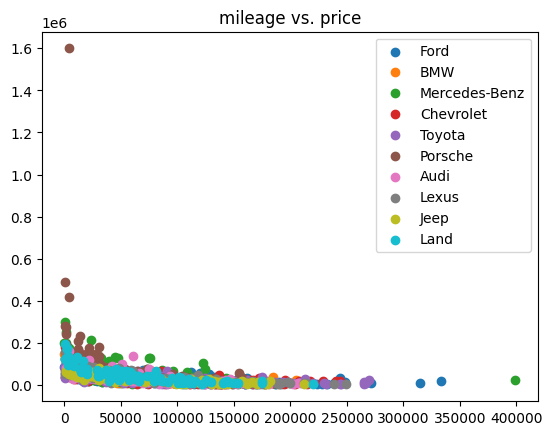

In [12]:
#scatterplot
import matplotlib.pyplot as plt

brand=car.groupby('brand').count().sort_values('model',ascending=False).index[:10] #top 10 brands(frequency)
for b in brand:
  plt.scatter(x=car[car['brand']==b]['milage'], y=car[car['brand']==b]['price'],label=b)

plt.legend()
plt.title("mileage vs. price")
plt.show()

In [13]:
#get rid of outliers
a25=car.describe().iloc[4:5].to_numpy()
a75=car.describe().iloc[6:7].to_numpy()

IQR=1.5*(a75-a25)
lower_range=a25-IQR
upper_range=a75+IQR

car=car[(car['model_year'] >= lower_range[0][0]) & (car['model_year'] <= upper_range[0][0])] #lower_Range=[[a,b,c]]
car=car[(car['milage'] >= lower_range[0][1]) & (car['milage'] <= upper_range[0][1])]
car=car[(car['price'] >= lower_range[0][2]) & (car['price'] <= upper_range[0][2])]

car.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000
8,Lexus,RC 350 F Sport,2021,23436,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,41927
12,Toyota,Supra 3.0 Premium,2021,12500,Gasoline,382.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,A/T,Yellow,Black,None reported,Yes,53500


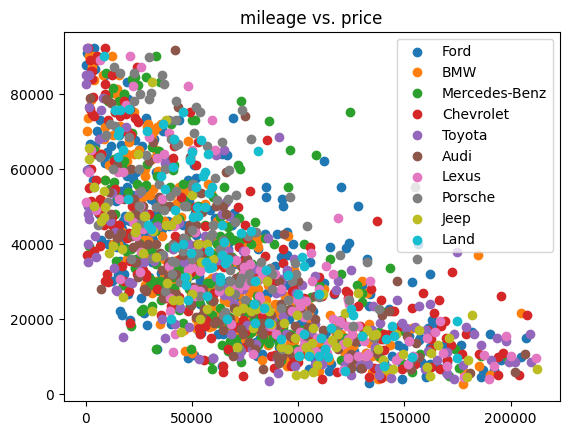

In [14]:
brand=car.groupby('brand').count().sort_values('model',ascending=False).index[:10]
for b in brand:
  plt.scatter(x=car[car['brand']==b]['milage'], y=car[car['brand']==b]['price'],label=b)
plt.legend()
plt.title("mileage vs. price")
plt.show()

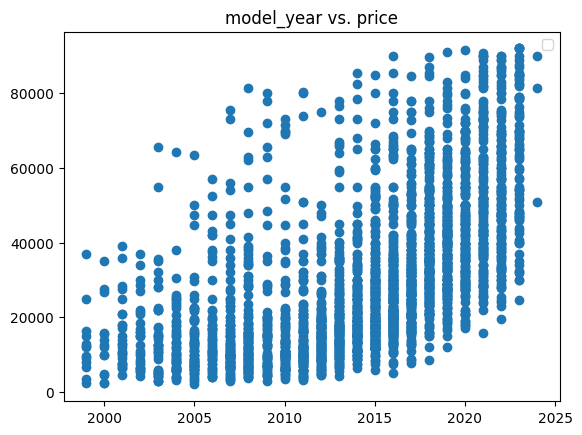

In [15]:
plt.scatter(x=car['model_year'], y=car['price'])
plt.legend()
plt.title("model_year vs. price")
plt.show()

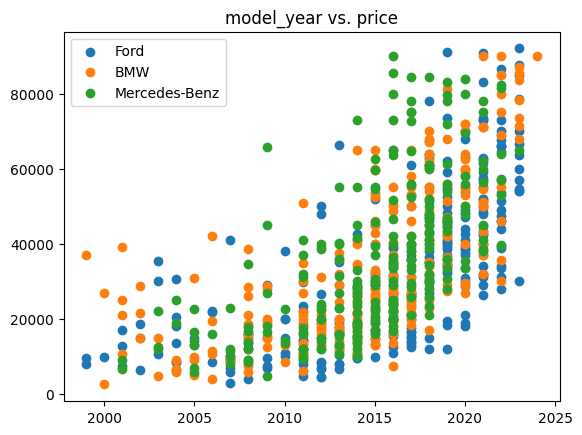

In [16]:
brand=car.groupby('brand').count().sort_values('model',ascending=False).index[:3]
for b in brand:
  plt.scatter(x=car[car['brand']==b]['model_year'], y=car[car['brand']==b]['price'],label=b)
plt.legend()
plt.title("model_year vs. price")
plt.show()

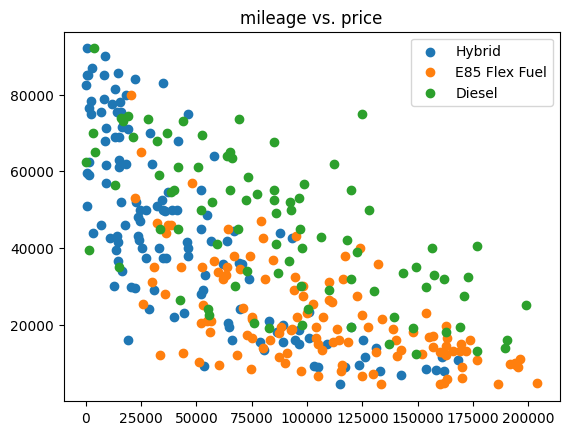

In [17]:
brand=car.groupby('fuel_type').count().sort_values('model',ascending=False).index[1:4]
for b in brand:
  plt.scatter(x=car[car['fuel_type']==b]['milage'], y=car[car['fuel_type']==b]['price'],label=b)
plt.legend()
plt.title("mileage vs. price")
plt.show()

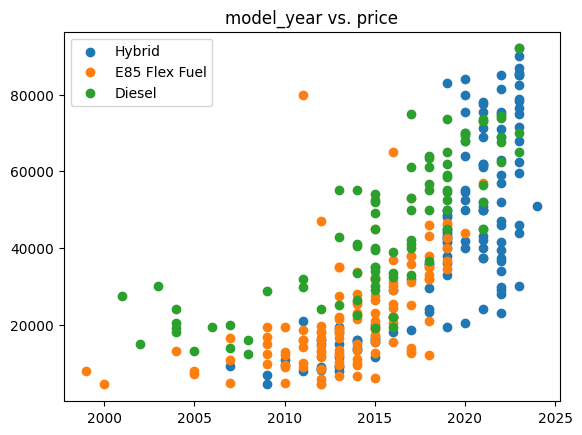

In [18]:
brand=car.groupby('fuel_type').count().sort_values('model',ascending=False).index[1:4]
for b in brand:
  plt.scatter(x=car[car['fuel_type']==b]['model_year'], y=car[car['fuel_type']==b]['price'],label=b)
plt.legend()
plt.title("model_year vs. price")
plt.show()